# What is the most optimal skill to learn for Data Analysts?
Methodology
1. Group skills to determine median salary and likelihood of being in posting
2. Visualize median salary vs percent skill demand
3. (Optional) Determine if certain technologies are more prevalent

In [1]:
# import libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import seaborn as sns

# loading data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# cleanng data
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

# cleaning the 'job_skills' into a list datatype
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

c:\Users\ezequ\anaconda3\envs\luke_b\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
# let's create a variable that saves tha data analysts jobs in Argentina
df_DA_ARG = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'Argentina')].copy()

In [7]:
df_DA_ARG = df_DA_ARG.dropna(subset=['salary_year_avg'])

df_DA_ARG_exploded = df_DA_ARG.explode('job_skills')

df_DA_ARG_exploded[['salary_year_avg', 'job_skills']].head(5)

,salary_year_avg,job_skills
93501,111202.0,sql
93501,111202.0,python
93501,111202.0,flow
345103,45000.0,sql
345103,45000.0,python


In [11]:
# let's group by median salary and count
# lest order it by count
df_DA_ARG_skills = df_DA_ARG_exploded.groupby('job_skills')['salary_year_avg'].agg(['count', 'median']).sort_values(by='count', ascending=False)

# let's rename our dataframe columns
df_DA_ARG_skills = df_DA_ARG_skills.rename(columns={'count': 'skill_count', 'median': 'median_salary'})

df_DA_ARG_skills

,skill_count,median_salary
job_skills,,
python,3,111175.0
sql,3,111175.0
excel,1,45000.0
flow,1,111202.0
javascript,1,45000.0
power bi,1,45000.0
sql server,1,45000.0
tableau,1,45000.0


In [12]:
DA_job_count = len(df_DA_ARG)

DA_job_count

4

In [13]:
# with that last new variable, we'll create a new column 'skill_percent'1_EDA_Intro.ipynb
df_DA_ARG_skills['skill_percent'] = df_DA_ARG_skills['skill_count'] / DA_job_count * 100

df_DA_ARG_skills

,skill_count,median_salary,skill_percent
job_skills,,,
python,3,111175.0,75.0
sql,3,111175.0,75.0
excel,1,45000.0,25.0
flow,1,111202.0,25.0
javascript,1,45000.0,25.0
power bi,1,45000.0,25.0
sql server,1,45000.0,25.0
tableau,1,45000.0,25.0


In [15]:
skill_percent = 3

df_DA_ARG_skills_high_demand = df_DA_ARG_skills[df_DA_ARG_skills['skill_percent'] > skill_percent]

df_DA_ARG_skills_high_demand

,skill_count,median_salary,skill_percent
job_skills,,,
python,3,111175.0,75.0
sql,3,111175.0,75.0
excel,1,45000.0,25.0
flow,1,111202.0,25.0
javascript,1,45000.0,25.0
power bi,1,45000.0,25.0
sql server,1,45000.0,25.0
tableau,1,45000.0,25.0


6 [-0.01307375 -0.87710046]
7 [ 0.35084444 -0.63734504]
2 [ 0.2886692  -0.03817512]
4 [-0.71159841  0.63509711]


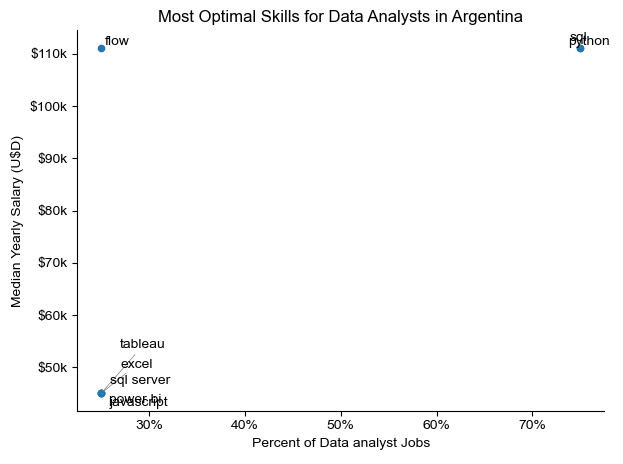

In [22]:
from adjustText import adjust_text

df_DA_ARG_skills_high_demand.plot(kind='scatter', x='skill_percent', y='median_salary')

texts = []
for i, txt in enumerate(df_DA_ARG_skills_high_demand.index):
    texts.append(plt.text(df_DA_ARG_skills_high_demand['skill_percent'].iloc[i], df_DA_ARG_skills_high_demand['median_salary'].iloc[i], txt))

adjust_text(texts, arrowprops=dict(arrowstyle='->', color='grey', lw=0.5))

from matplotlib.ticker import PercentFormatter

ax = plt.gca()
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}k'))
ax.xaxis.set_major_formatter(PercentFormatter(decimals=0))

sns.despine()
sns.set_theme(style='ticks')

plt.xlabel('Percent of Data analyst Jobs')
plt.ylabel('Median Yearly Salary (U$D)')
plt.title('Most Optimal Skills for Data Analysts in Argentina')
plt.tight_layout()
plt.show()